In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!ls '/content/drive/My Drive/images_split/'


In [ ]:
# data_train_path = "/content/drive/My Drive/images_split/train"
# data_test_path = "/content/drive/My Drive/images_split/test"
# data_val_path = "/content/drive/My Drive/images_split/val"

In [ ]:
import gdown

# رابط التنزيل المباشر مع معرف الملف
file_url = 'https://drive.google.com/uc?id=1CGiAWso43GCsNo_faRq4jdDIlmwy7YI4'
output = '/content/Fruit_Vegetables.zip'  # اسم الملف الذي سيتم حفظه به
gdown.download(file_url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1CGiAWso43GCsNo_faRq4jdDIlmwy7YI4
From (redirected): https://drive.google.com/uc?id=1CGiAWso43GCsNo_faRq4jdDIlmwy7YI4&confirm=t&uuid=079cc191-dc68-4da2-8ce2-a8bbf752e5c7
To: /content/Fruit_Vegetables.zip
100%|██████████| 2.13G/2.13G [00:15<00:00, 138MB/s]


'/content/Fruit_Vegetables.zip'

In [ ]:
!unzip /content/Fruit_Vegetables.zip -d /content/


Archive:  /content/Fruit_Vegetables.zip
replace /content/Fruits_Vegetables/test/apple/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Fruits_Vegetables/test/apple/Image_1.jpg  
replace /content/Fruits_Vegetables/test/apple/Image_10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/Fruits_Vegetables/test/apple/Image_10.jpg  
replace /content/Fruits_Vegetables/test/apple/Image_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data_train_path = "/content/Fruits_Vegetables/train"
data_test_path= "/content/Fruits_Vegetables/test"
data_val_path = "/content/Fruits_Vegetables/validation"

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (180, 180),
    batch_size =  32,
    validation_split = False
)

Found 3115 files belonging to 36 classes.


In [ ]:

data_cat = data_train.class_names
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle = False,
    image_size = (180, 180),
    batch_size =  32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (180, 180),
    batch_size =  32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


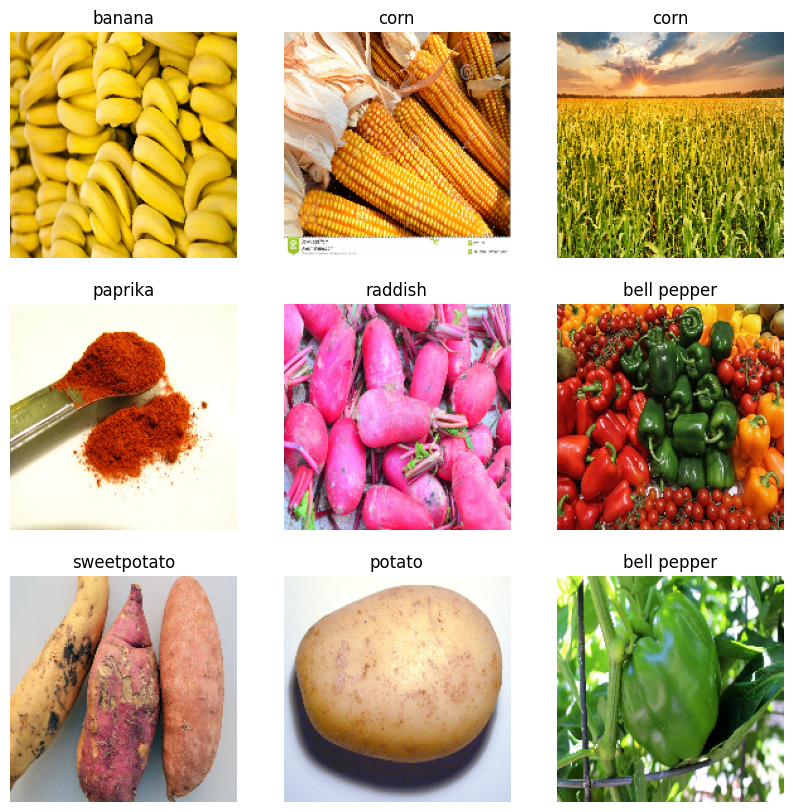

In [ ]:
plt.figure(figsize= (10, 10))
for image, labels in data_train.take(1):
  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(data_cat[labels[i]])
    plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D, MaxPooling2D, Rescaling

In [ ]:
# model = Sequential([
#     Rescaling(1./255),    # normalizes the input images by dividing the pixel values by 255 (to scale them between 0 and 1).
#     Conv2D(16, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(32, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, (3, 3), padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dropout(0.2),
#     Dense(128),
#     Dense(len(data_cat))

# ])

In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False)

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(len(data_cat), activation='softmax')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5,
    mode= 'max',
    restore_best_weights =  True

)

In [ ]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer= 'Adam', metrics=['accuracy'])

In [ ]:
model.fit(data_train, validation_data= data_val, epochs = 10, callbacks=[early_stop])

Epoch 1/10
29/98 ━━━━━━━━━━━━━━━━━━━━ 13:51 12s/step - accuracy: 0.1297 - loss: 3.8400

KeyboardInterrupt: 

In [ ]:
epochs_range = 10
plt.figure(figsize=(8, 8))
plt.subplots(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label="Training Accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplots(1,2,2)
plt.plot(epochs_range, history.history['loss'], label="Training loss")
plt.plot(epochs_range, history.history['val_loss'], label="Validation loss")
plt.title("Loss")

In [ ]:
image = ''
image = tf.keras.utils.load_img(image, target_size=(180, 180))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [ ]:
prediction = model.predict(img_bat)

In [ ]:
score = tf.nn.softmax(prediction)

In [ ]:
print("Veg/Fruits in image is {} with accuracy of {:0.2f}".format(data_cat[np.argmax(score)], np.max(score)*100))

In [ ]:
model.save("Image_classify.keras")